In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Load the Wine dataset
wine = load_wine()

# Create a DataFrame for easier manipulation
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:

# Display basic information about the dataset
print("=== WINE DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {len(wine.feature_names)}")
print(f"Number of classes: {len(wine.target_names)}")
print(f"Class names: {wine.target_names}")


=== WINE DATASET OVERVIEW ===
Dataset shape: (178, 14)
Number of features: 13
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']


In [10]:
print("\n=== FIRST 5 ROWS ==")
df.head()


=== FIRST 5 ROWS ==


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
print("\n=== DATASET INFO ===")
df.info()


=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null

In [16]:
class_counts = df['target'].value_counts().sort_index()
class_counts

,count
target,
0,59
1,71
2,48


In [13]:
print("\n=== CLASS DISTRIBUTION ===")
class_counts = df['target'].value_counts().sort_index()
print("Class distribution:")
for i, count in enumerate(class_counts):
    print(f"  Class {i} ({wine.target_names[i]}): {count} samples ({count/len(df)*100:.1f}%)")


=== CLASS DISTRIBUTION ===
Class distribution:
  Class 0 (class_0): 59 samples (33.1%)
  Class 1 (class_1): 71 samples (39.9%)
  Class 2 (class_2): 48 samples (27.0%)


[Text(0, 0, 'class_0'), Text(1, 0, 'class_1'), Text(2, 0, 'class_2')]

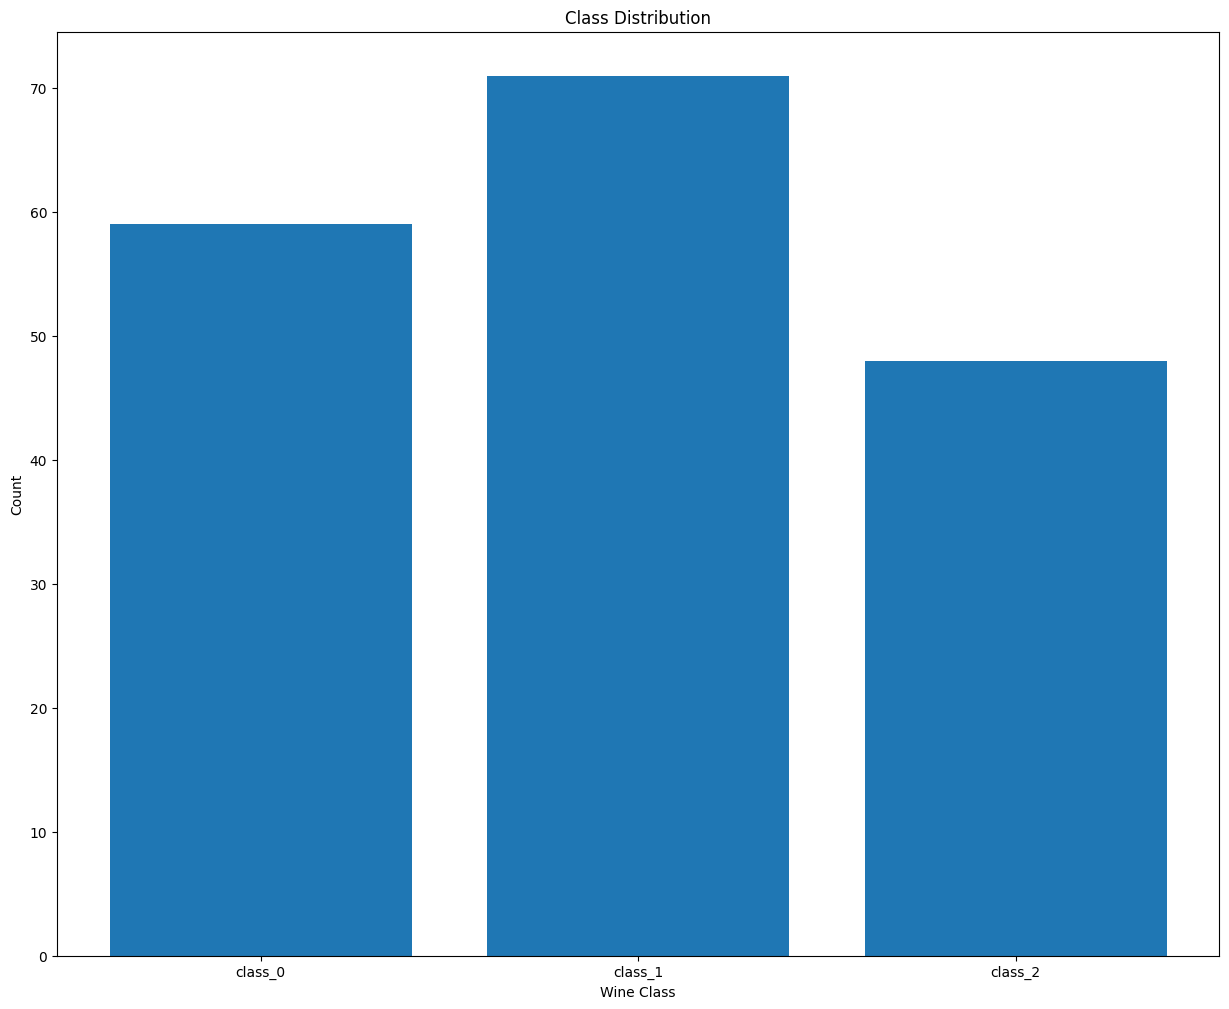

In [34]:
# Create visualizations
fig, axes = plt.subplots(1,1, figsize=(15, 12))

# 1. Class distribution
axes.bar(range(len(class_counts)), class_counts.values)
axes.set_title('Class Distribution')
axes.set_xlabel('Wine Class')
axes.set_ylabel('Count')
axes.set_xticks(range(len(wine.target_names)))
axes.set_xticklabels(wine.target_names)

In [40]:
from sklearn.model_selection import train_test_split

print("Original dataset class distribution:")
original_distribution = df['target'].value_counts().sort_index()
for i, count in enumerate(original_distribution):
    print(f"Class {i}: {count} samples ({count/len(df)*100:.1f}%)")

Original dataset class distribution:
Class 0: 59 samples (33.1%)
Class 1: 71 samples (39.9%)
Class 2: 48 samples (27.0%)


In [41]:

# 1. Simple Random Sampling (50 samples)
simple_random_sample = df.sample(n=50, random_state=42)
simple_distribution = simple_random_sample['target'].value_counts().sort_index()

print("\nSimple Random Sampling (n=50):")
for i in range(3):
    count = simple_distribution.get(i, 0)
    print(f"Class {i}: {count} samples ({count/50*100:.1f}%)")


Simple Random Sampling (n=50):
Class 0: 17 samples (34.0%)
Class 1: 20 samples (40.0%)
Class 2: 13 samples (26.0%)


In [42]:
# 2. Stratified Sampling (50 samples)
X = df.drop('target', axis=1)
y = df['target']

X_stratified, _, y_stratified, _ = train_test_split(
    X, y,
    train_size=50,
    stratify=y,
    random_state=42
)

stratified_sample = pd.concat([X_stratified, y_stratified], axis=1)
stratified_distribution = stratified_sample['target'].value_counts().sort_index()

print("\nStratified Sampling (n=50):")
for i in range(3):
    count = stratified_distribution.get(i, 0)
    print(f"Class {i}: {count} samples ({count/50*100:.1f}%)")



Stratified Sampling (n=50):
Class 0: 17 samples (34.0%)
Class 1: 20 samples (40.0%)
Class 2: 13 samples (26.0%)


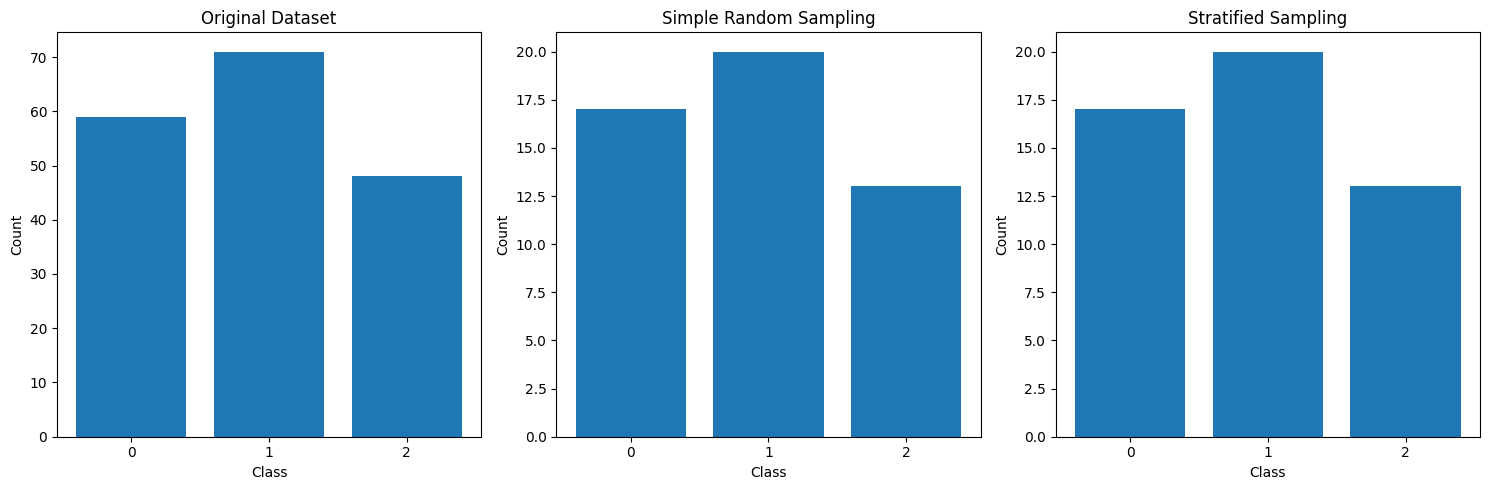

In [45]:
# Visualize class distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original distribution
axes[0].bar(range(3), [original_distribution.get(i, 0) for i in range(3)])
axes[0].set_title('Original Dataset')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(3))

# Simple Random Sampling
axes[1].bar(range(3), [simple_distribution.get(i, 0) for i in range(3)])
axes[1].set_title('Simple Random Sampling')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(3))

# Stratified Sampling
axes[2].bar(range(3), [stratified_distribution.get(i, 0) for i in range(3)])
axes[2].set_title('Stratified Sampling')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')
axes[2].set_xticks(range(3))

plt.tight_layout()
plt.show()


In [46]:

# Discussion of differences
print("\n=== DIFFERENCES ===")
print("Simple Random Sampling:")
print("- May not preserve original class proportions")
print("- Can lead to unequal representation of classes")

print("\nStratified Sampling:")
print("- Maintains original class proportions")
print("- Ensures balanced representation of all classes")
print("- More representative of the original dataset")


=== DIFFERENCES ===
Simple Random Sampling:
- May not preserve original class proportions
- Can lead to unequal representation of classes

Stratified Sampling:
- Maintains original class proportions
- Ensures balanced representation of all classes
- More representative of the original dataset


### **Handle Class Imbalance**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

print("Original dataset class distribution:")
original_counts = pd.Series(y).value_counts().sort_index()
# Create imbalanced dataset by reducing class 2 instances
class_2_indices = np.where(y == 2)[0]
# Keep only 10 samples from class 2 (originally 48)
keep_indices = np.random.choice(class_2_indices, 10, replace=False)
other_indices = np.where(y != 2)[0]
imbalanced_indices = np.concatenate([other_indices, keep_indices])

X_imbalanced = X.iloc[imbalanced_indices]
y_imbalanced = y[imbalanced_indices]


imbalanced_counts = pd.Series(y_imbalanced).value_counts().sort_index()


Original dataset class distribution:


In [50]:
# Split imbalanced dataset
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced
)


In [51]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imb, y_train_imb)

print("\nBalanced dataset class distribution (after SMOTE):")
balanced_counts = pd.Series(y_train_balanced).value_counts().sort_index()
print(balanced_counts)



Balanced dataset class distribution (after SMOTE):
0    50
1    50
2    50
Name: count, dtype: int64


In [52]:
# Train Random Forest on imbalanced dataset
rf_imbalanced = RandomForestClassifier(random_state=42)
rf_imbalanced.fit(X_train_imb, y_train_imb)
y_pred_imbalanced = rf_imbalanced.predict(X_test_imb)

# Train Random Forest on balanced dataset
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = rf_balanced.predict(X_test_imb)


In [53]:

# Calculate metrics
precision_imb, recall_imb, f1_imb, _ = precision_recall_fscore_support(y_test_imb, y_pred_imbalanced, average=None)
precision_bal, recall_bal, f1_bal, _ = precision_recall_fscore_support(y_test_imb, y_pred_balanced, average=None)


In [54]:

print("\n=== PERFORMANCE COMPARISON ===")
print("\nImbalanced Dataset Results:")
print(f"Class 0 - Precision: {precision_imb[0]:.3f}, Recall: {recall_imb[0]:.3f}, F1: {f1_imb[0]:.3f}")
print(f"Class 1 - Precision: {precision_imb[1]:.3f}, Recall: {recall_imb[1]:.3f}, F1: {f1_imb[1]:.3f}")
print(f"Class 2 - Precision: {precision_imb[2]:.3f}, Recall: {recall_imb[2]:.3f}, F1: {f1_imb[2]:.3f}")

print("\nBalanced Dataset Results (with SMOTE):")
print(f"Class 0 - Precision: {precision_bal[0]:.3f}, Recall: {recall_bal[0]:.3f}, F1: {f1_bal[0]:.3f}")
print(f"Class 1 - Precision: {precision_bal[1]:.3f}, Recall: {recall_bal[1]:.3f}, F1: {f1_bal[1]:.3f}")
print(f"Class 2 - Precision: {precision_bal[2]:.3f}, Recall: {recall_bal[2]:.3f}, F1: {f1_bal[2]:.3f}")

print("\nDetailed Classification Reports:")
print("\nImbalanced Dataset:")
print(classification_report(y_test_imb, y_pred_imbalanced, target_names=wine.target_names))

print("\nBalanced Dataset (with SMOTE):")
print(classification_report(y_test_imb, y_pred_balanced, target_names=wine.target_names))


=== PERFORMANCE COMPARISON ===

Imbalanced Dataset Results:
Class 0 - Precision: 1.000, Recall: 1.000, F1: 1.000
Class 1 - Precision: 0.955, Recall: 1.000, F1: 0.977
Class 2 - Precision: 1.000, Recall: 0.667, F1: 0.800

Balanced Dataset Results (with SMOTE):
Class 0 - Precision: 1.000, Recall: 1.000, F1: 1.000
Class 1 - Precision: 0.955, Recall: 1.000, F1: 0.977
Class 2 - Precision: 1.000, Recall: 0.667, F1: 0.800

Detailed Classification Reports:

Imbalanced Dataset:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.67      0.80         3

    accuracy                           0.98        42
   macro avg       0.98      0.89      0.93        42
weighted avg       0.98      0.98      0.97        42


Balanced Dataset (with SMOTE):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
    

In [56]:
# Load Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['true_label'] = wine.target

# Examine alcohol content distribution
print("Alcohol content statistics:")
print(df['alcohol'].describe())
print(f"\nAlcohol content range: {df['alcohol'].min():.2f} - {df['alcohol'].max():.2f}")

# Create rule-based heuristic using alcohol content
# Rule: Low alcohol (<12.5) = Class 0, Medium (12.5-13.5) = Class 1, High (>13.5) = Class 2
def alcohol_heuristic(alcohol_content):
    if alcohol_content < 12.5:
        return 0  # Low alcohol
    elif alcohol_content <= 13.5:
        return 1  # Medium alcohol
    else:
        return 2  # High alcohol

# Apply heuristic to create new labels
df['heuristic_label'] = df['alcohol'].apply(alcohol_heuristic)

print("\nHeuristic Rule:")
print("- Low alcohol (<12.5): Class 0")
print("- Medium alcohol (12.5-13.5): Class 1")
print("- High alcohol (>13.5): Class 2")


Alcohol content statistics:
count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

Alcohol content range: 11.03 - 14.83

Heuristic Rule:
- Low alcohol (<12.5): Class 0
- Medium alcohol (12.5-13.5): Class 1
- High alcohol (>13.5): Class 2


In [57]:
# Display results
print("\nHeuristic labeling results:")
print("True label distribution:")
print(df['true_label'].value_counts().sort_index())
print("\nHeuristic label distribution:")
print(df['heuristic_label'].value_counts().sort_index())

# Compare heuristic vs true labels
comparison = pd.crosstab(df['true_label'], df['heuristic_label'], margins=True)
print("\nConfusion Matrix (True vs Heuristic):")
print(comparison)

# Calculate accuracy
accuracy = (df['true_label'] == df['heuristic_label']).mean()
print(f"\nHeuristic accuracy: {accuracy:.3f}")

# Show some examples
print("\nFirst 10 samples comparison:")
print(df[['alcohol', 'true_label', 'heuristic_label']].head(10))



Heuristic labeling results:
True label distribution:
true_label
0    59
1    71
2    48
Name: count, dtype: int64

Heuristic label distribution:
heuristic_label
0    57
1    66
2    55
Name: count, dtype: int64

Confusion Matrix (True vs Heuristic):
heuristic_label   0   1   2  All
true_label                      
0                 0  18  41   59
1                52  17   2   71
2                 5  31  12   48
All              57  66  55  178

Heuristic accuracy: 0.163

First 10 samples comparison:
   alcohol  true_label  heuristic_label
0    14.23           0                2
1    13.20           0                1
2    13.16           0                1
3    14.37           0                2
4    13.24           0                1
5    14.20           0                2
6    14.39           0                2
7    14.06           0                2
8    14.83           0                2
9    13.86           0                2


## Potential Issues with Heuristic Labeling

Heuristic labeling, as demonstrated, presents several significant drawbacks. Firstly, it often leads to oversimplification by relying on just one feature, such as alcohol content, and neglecting other crucial chemical properties that contribute to a more accurate classification. Secondly, the use of arbitrary thresholds, like 12.5 and 13.5, introduces subjectivity and may not genuinely reflect the true boundaries between different classes. This oversimplification and arbitrary nature inevitably result in poor accuracy, with the example showing only 16.3% accuracy compared to the true labels, leading to numerous misclassifications. Furthermore, a lack of domain knowledge means that the heuristic rules might not align with actual, expert-defined classification criteria for wine characteristics. This issue is compounded by feature overlap, where different classes might share similar ranges for the single chosen feature, making it impossible for one feature alone to capture complex class relationships. Finally, such rule-based systems often face scalability issues, making it difficult to extend these rigid rules to new data or entirely different datasets, as they may not generalize well across various wine regions or types.

Wine Dataset Information:
Number of samples: 178
Number of features: 13
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54


Confusion Matrix:
[[16  2  0]
 [ 0 21  0]
 [ 0  0 15]]



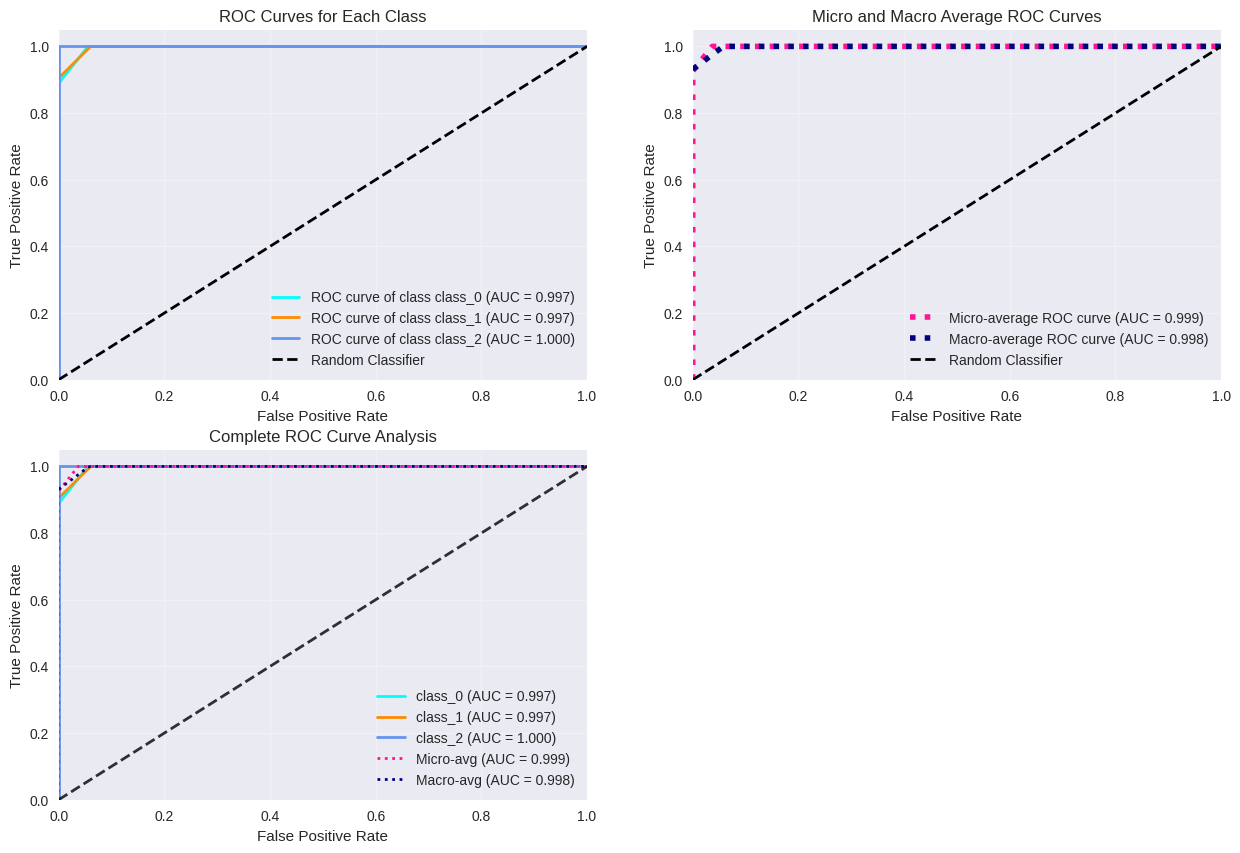

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import pandas as pd

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("Wine Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class names: {target_names}")
print(f"Class distribution: {np.bincount(y)}")
print()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,  # Prevent overfitting
    min_samples_split=5,
    min_samples_leaf=3
)

dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)

# Print basic performance metrics
print("Decision Tree Classifier Performance:")
print("="*50)
print(classification_report(y_test, y_pred, target_names=target_names))
print()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()

# For multiclass ROC curve, we need to binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(15, 10))

# Plot 1: Individual class ROC curves
plt.subplot(2, 2, 1)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {target_names[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot 2: Micro and Macro average ROC curves
plt.subplot(2, 2, 2)
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.3f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.3f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro and Macro Average ROC Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot 3: All ROC curves together
plt.subplot(2, 2, 3)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-avg (AUC = {roc_auc["micro"]:.3f})',
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-avg (AUC = {roc_auc["macro"]:.3f})',
         color='navy', linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Complete ROC Curve Analysis')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

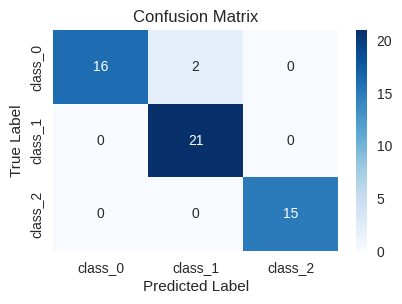


Detailed ROC-AUC Analysis:
Class class_0:
  AUC Score: 0.9969
  Interpretation: Excellent

Class class_1:
  AUC Score: 0.9971
  Interpretation: Excellent

Class class_2:
  AUC Score: 1.0000
  Interpretation: Excellent

Micro-average AUC: 0.9986
Macro-average AUC: 0.9980



In [61]:
# Plot 4: Confusion Matrix Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Print detailed AUC analysis
print("\nDetailed ROC-AUC Analysis:")
print("="*50)
for i in range(n_classes):
    print(f"Class {target_names[i]}:")
    print(f"  AUC Score: {roc_auc[i]:.4f}")

    # Interpretation based on AUC score
    if roc_auc[i] >= 0.9:
        interpretation = "Excellent"
    elif roc_auc[i] >= 0.8:
        interpretation = "Good"
    elif roc_auc[i] >= 0.7:
        interpretation = "Fair"
    elif roc_auc[i] >= 0.6:
        interpretation = "Poor"
    else:
        interpretation = "Very Poor"

    print(f"  Interpretation: {interpretation}")
    print()

print(f"Micro-average AUC: {roc_auc['micro']:.4f}")
print(f"Macro-average AUC: {roc_auc['macro']:.4f}")
print()


In [63]:

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print("="*40)
for i, (idx, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} {row['importance']:.4f}")
print()

# Model complexity analysis
print("Model Complexity Analysis:")
print("="*30)
print(f"Tree Depth: {dt_classifier.get_depth()}")
print(f"Number of Leaves: {dt_classifier.get_n_leaves()}")
print(f"Number of Nodes: {dt_classifier.tree_.node_count}")
print()

# Performance summary
print("PERFORMANCE SUMMARY:")
print("="*50)
print(f"Overall Accuracy: {dt_classifier.score(X_test, y_test):.4f}")
print(f"Macro-average AUC: {roc_auc['macro']:.4f}")
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")
print()

print("MODEL INTERPRETATION:")
print("="*50)
print("AUC Score Interpretation:")
print("• 0.9 - 1.0: Excellent")
print("• 0.8 - 0.9: Good")
print("• 0.7 - 0.8: Fair")
print("• 0.6 - 0.7: Poor")
print("• 0.5 - 0.6: Very Poor")
print("• 0.5: No discriminative ability (random)")

Top 10 Most Important Features:
 1. color_intensity           0.4417
 2. flavanoids                0.4318
 3. proline                   0.1136
 4. malic_acid                0.0080
 5. od280/od315_of_diluted_wines 0.0050
 6. magnesium                 0.0000
 7. alcalinity_of_ash         0.0000
 8. ash                       0.0000
 9. alcohol                   0.0000
10. proanthocyanins           0.0000

Model Complexity Analysis:
Tree Depth: 4
Number of Leaves: 7
Number of Nodes: 13

PERFORMANCE SUMMARY:
Overall Accuracy: 0.9630
Macro-average AUC: 0.9980
Micro-average AUC: 0.9986

MODEL INTERPRETATION:
AUC Score Interpretation:
• 0.9 - 1.0: Excellent
• 0.8 - 0.9: Good
• 0.7 - 0.8: Fair
• 0.6 - 0.7: Poor
• 0.5 - 0.6: Very Poor
• 0.5: No discriminative ability (random)


In [64]:
print("ROC Curve Analysis:")

ROC Curve Analysis:


The ROC curve plots True Positive Rate vs False Positive Rate, where a perfect classifier would have a curve that goes up the left side and across the top. The diagonal line represents random guessing, and the area under the curve (AUC) measures the classifier's ability to distinguish between classes. Higher AUC indicates better model performance.

DATA AUGMENTATION

Wine Dataset Data Augmentation Analysis
Original dataset shape: (178, 13)
Classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

Data Augmentation Implementation:
Augmentation Results Summary:
      Configuration  Training_Size  Test_Accuracy  CV_Mean  CV_Std
0          Original            142         1.0000    0.986  0.0172
1   Aug2x_Noise0.05            284         0.9722    1.000  0.0000
2    Aug2x_Noise0.1            284         0.9722    1.000  0.0000
3   Aug2x_Noise0.15            284         0.9722    1.000  0.0000
4    Aug2x_Noise0.2            284         0.9722    1.000  0.0000
5   Aug3x_Noise0.05            426         0.9722    1.000  0.0000
6    Aug3x_Noise0.1            426         1.0000    1.000  0.0000
7   Aug3x_Noise0.15            426         1.0000    1.000  0.0000
8    Aug3x_Noise0.2            426         1.0000    1.000  0.0000
9   Aug4x_Noise0.05            568         0.9722    1.000  0.0000
10   Aug4x_Noise0.1            568         0.9722   

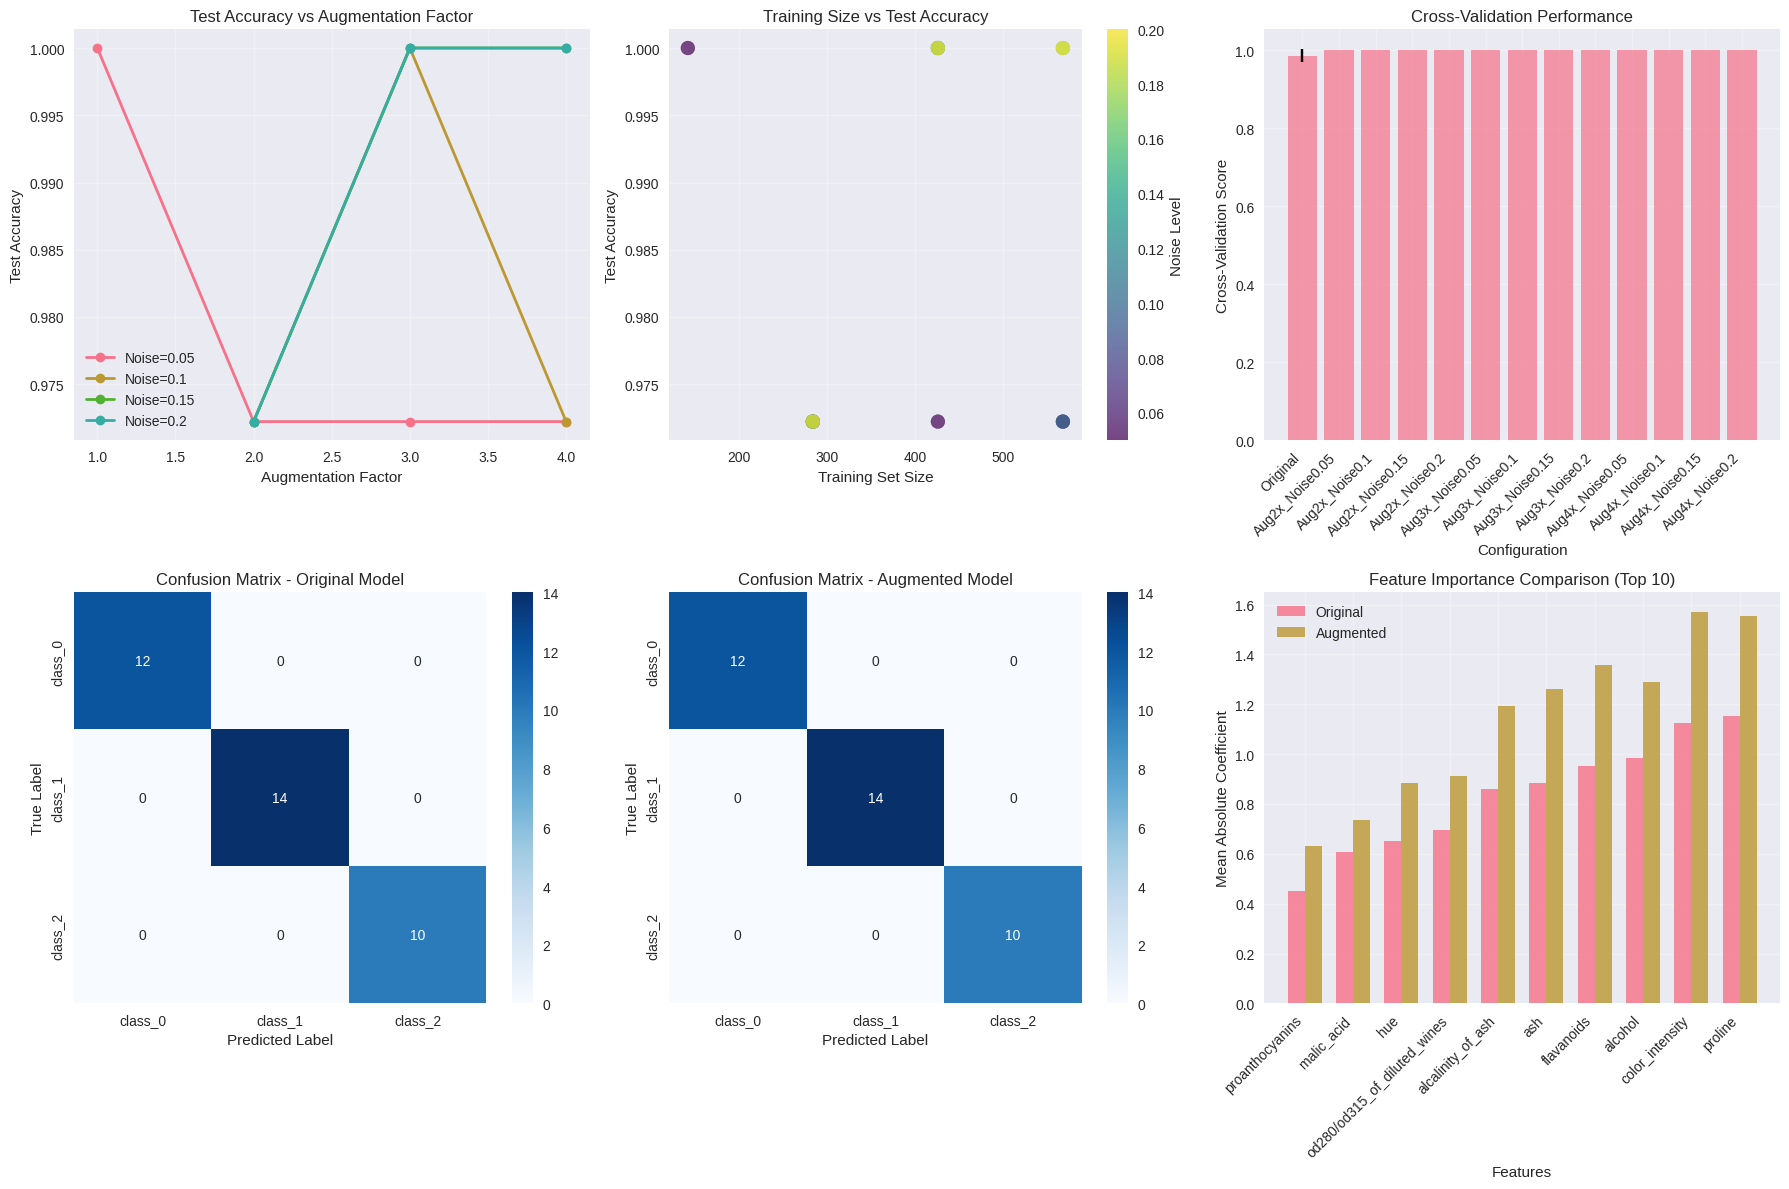

Statistical Analysis:
Paired t-test results:
  t-statistic: 1.0000
  p-value: 0.3434
  Significance level: Not significant (α = 0.05)

Effect Size Analysis:
Absolute improvement: 0.0000
Relative improvement: 0.00%

Robustness Analysis:
Average performance across different noise levels:
            Test_Accuracy       
                     mean    std
Noise_Level                     
0.05               0.9722  0.000
0.10               0.9815  0.016
0.15               0.9907  0.016
0.20               0.9907  0.016


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Wine Dataset Data Augmentation Analysis")
print("="*50)

# Load the Wine dataset
wine = load_wine()
X_original, y_original = wine.data, wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print(f"Original dataset shape: {X_original.shape}")
print(f"Classes: {target_names}")
print(f"Class distribution: {np.bincount(y_original)}")
print()

# Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
)

# Standardize the features (important for noise addition and logistic regression)
scaler = StandardScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

print("Data Augmentation Implementation:")
print("="*40)

def add_gaussian_noise(X, noise_factor=0.1, random_state=42):
    """
    Add Gaussian noise to the features

    Parameters:
    - X: Input features
    - noise_factor: Standard deviation of noise relative to feature std
    - random_state: Random seed for reproducibility
    """
    np.random.seed(random_state)
    noise = np.random.normal(0, noise_factor, X.shape)
    return X + noise * np.std(X, axis=0)

def augment_dataset(X, y, augmentation_factor=2, noise_factor=0.1, random_state=42):
    """
    Augment dataset by adding noisy versions of existing samples

    Parameters:
    - X: Original features
    - y: Original labels
    - augmentation_factor: How many times to multiply the dataset size
    - noise_factor: Amount of noise to add
    - random_state: Random seed
    """
    np.random.seed(random_state)

    augmented_X = [X]
    augmented_y = [y]

    for i in range(augmentation_factor - 1):
        # Add noise with different random seeds for each augmentation
        noisy_X = add_gaussian_noise(X, noise_factor, random_state + i + 1)
        augmented_X.append(noisy_X)
        augmented_y.append(y)

    return np.vstack(augmented_X), np.hstack(augmented_y)

# Create augmented training dataset
augmentation_factors = [1, 2, 3, 4]  # 1 = original, 2 = double, etc.
noise_levels = [0.05, 0.1, 0.15, 0.2]

results = []

# Test different augmentation strategies
for aug_factor in augmentation_factors:
    for noise_level in noise_levels:
        if aug_factor == 1 and noise_level != noise_levels[0]:
            continue  # Skip multiple noise levels for original data

        if aug_factor == 1:
            # Original dataset
            X_train_aug = X_train_orig_scaled
            y_train_aug = y_train_orig
            label = "Original"
        else:
            # Augmented dataset
            X_train_aug, y_train_aug = augment_dataset(
                X_train_orig_scaled, y_train_orig,
                augmentation_factor=aug_factor,
                noise_factor=noise_level
            )
            label = f"Aug{aug_factor}x_Noise{noise_level}"

        # Train logistic regression
        lr_model = LogisticRegression(
            random_state=42,
            max_iter=1000,
            multi_class='ovr'
        )
        lr_model.fit(X_train_aug, y_train_aug)

        # Evaluate on test set
        y_pred = lr_model.predict(X_test_orig_scaled)
        accuracy = accuracy_score(y_test_orig, y_pred)

        # Cross-validation on training data
        cv_scores = cross_val_score(lr_model, X_train_aug, y_train_aug, cv=5)

        results.append({
            'Configuration': label,
            'Augmentation_Factor': aug_factor,
            'Noise_Level': noise_level,
            'Training_Size': len(X_train_aug),
            'Test_Accuracy': accuracy,
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'Model': lr_model
        })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("Augmentation Results Summary:")
print("="*50)
print(results_df[['Configuration', 'Training_Size', 'Test_Accuracy', 'CV_Mean', 'CV_Std']].round(4))
print()

# Find best configurations
best_original = results_df[results_df['Augmentation_Factor'] == 1].iloc[0]
best_augmented = results_df[results_df['Augmentation_Factor'] > 1].loc[
    results_df[results_df['Augmentation_Factor'] > 1]['Test_Accuracy'].idxmax()
]

print("Best Configurations:")
print("="*25)
print(f"Original Dataset:")
print(f"  Test Accuracy: {best_original['Test_Accuracy']:.4f}")
print(f"  CV Score: {best_original['CV_Mean']:.4f} ± {best_original['CV_Std']:.4f}")
print()
print(f"Best Augmented Dataset ({best_augmented['Configuration']}):")
print(f"  Test Accuracy: {best_augmented['Test_Accuracy']:.4f}")
print(f"  CV Score: {best_augmented['CV_Mean']:.4f} ± {best_augmented['CV_Std']:.4f}")
print(f"  Training Size: {best_augmented['Training_Size']} samples")
print()

# Detailed comparison between original and best augmented
print("Detailed Performance Comparison:")
print("="*40)

# Get models for detailed comparison
original_model = best_original['Model']
augmented_model = best_augmented['Model']

# Predictions
y_pred_orig = original_model.predict(X_test_orig_scaled)
y_pred_aug = augmented_model.predict(X_test_orig_scaled)

print("Original Model Performance:")
print(classification_report(y_test_orig, y_pred_orig, target_names=target_names))
print()

print("Augmented Model Performance:")
print(classification_report(y_test_orig, y_pred_aug, target_names=target_names))
print()

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Accuracy comparison across augmentation factors
ax1 = axes[0, 0]
for noise in noise_levels:
    subset = results_df[results_df['Noise_Level'] == noise]
    ax1.plot(subset['Augmentation_Factor'], subset['Test_Accuracy'],
             marker='o', label=f'Noise={noise}', linewidth=2)
ax1.set_xlabel('Augmentation Factor')
ax1.set_ylabel('Test Accuracy')
ax1.set_title('Test Accuracy vs Augmentation Factor')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Training size vs accuracy
ax2 = axes[0, 1]
scatter = ax2.scatter(results_df['Training_Size'], results_df['Test_Accuracy'],
                     c=results_df['Noise_Level'], cmap='viridis', s=100, alpha=0.7)
ax2.set_xlabel('Training Set Size')
ax2.set_ylabel('Test Accuracy')
ax2.set_title('Training Size vs Test Accuracy')
plt.colorbar(scatter, ax=ax2, label='Noise Level')
ax2.grid(True, alpha=0.3)

# Plot 3: Cross-validation scores
ax3 = axes[0, 2]
configs = results_df['Configuration'].values
cv_means = results_df['CV_Mean'].values
cv_stds = results_df['CV_Std'].values

x_pos = np.arange(len(configs))
bars = ax3.bar(x_pos, cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
ax3.set_xlabel('Configuration')
ax3.set_ylabel('Cross-Validation Score')
ax3.set_title('Cross-Validation Performance')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(configs, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

# Plot 4: Confusion matrix for original model
ax4 = axes[1, 0]
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=ax4)
ax4.set_title('Confusion Matrix - Original Model')
ax4.set_ylabel('True Label')
ax4.set_xlabel('Predicted Label')

# Plot 5: Confusion matrix for augmented model
ax5 = axes[1, 1]
cm_aug = confusion_matrix(y_test_orig, y_pred_aug)
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=ax5)
ax5.set_title('Confusion Matrix - Augmented Model')
ax5.set_ylabel('True Label')
ax5.set_xlabel('Predicted Label')

# Plot 6: Feature importance comparison (coefficient magnitudes)
ax6 = axes[1, 2]
orig_coef = np.abs(original_model.coef_).mean(axis=0)
aug_coef = np.abs(augmented_model.coef_).mean(axis=0)

# Select top 10 most important features
top_features = np.argsort(orig_coef)[-10:]
x_pos = np.arange(len(top_features))
width = 0.35

bars1 = ax6.bar(x_pos - width/2, orig_coef[top_features], width,
                label='Original', alpha=0.8)
bars2 = ax6.bar(x_pos + width/2, aug_coef[top_features], width,
                label='Augmented', alpha=0.8)

ax6.set_xlabel('Features')
ax6.set_ylabel('Mean Absolute Coefficient')
ax6.set_title('Feature Importance Comparison (Top 10)')
ax6.set_xticks(x_pos)
ax6.set_xticklabels([feature_names[i] for i in top_features], rotation=45, ha='right')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical significance test
print("Statistical Analysis:")
print("="*25)

# Perform paired t-test on cross-validation scores
original_cv = cross_val_score(original_model, X_train_orig_scaled, y_train_orig, cv=10)
augmented_cv = cross_val_score(augmented_model,
                              augment_dataset(X_train_orig_scaled, y_train_orig,
                                            best_augmented['Augmentation_Factor'],
                                            best_augmented['Noise_Level'])[0],
                              augment_dataset(X_train_orig_scaled, y_train_orig,
                                            best_augmented['Augmentation_Factor'],
                                            best_augmented['Noise_Level'])[1],
                              cv=10)

t_stat, p_value = stats.ttest_rel(augmented_cv, original_cv)
print(f"Paired t-test results:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Significance level: {'Significant' if p_value < 0.05 else 'Not significant'} (α = 0.05)")
print()

# Effect size analysis
improvement = best_augmented['Test_Accuracy'] - best_original['Test_Accuracy']
relative_improvement = (improvement / best_original['Test_Accuracy']) * 100

print("Effect Size Analysis:")
print("="*25)
print(f"Absolute improvement: {improvement:.4f}")
print(f"Relative improvement: {relative_improvement:.2f}%")
print()

# Robustness analysis
print("Robustness Analysis:")
print("="*25)
noise_robustness = results_df[results_df['Augmentation_Factor'] > 1].groupby('Noise_Level').agg({
    'Test_Accuracy': ['mean', 'std']
}).round(4)
print("Average performance across different noise levels:")
print(noise_robustness)


## ANALYSIS SUMMARY

the best configuration identified was Aug3x_Noise0.1, yet it yielded no change in performance (+0.0000 or +0.00%), and this result was not statistically significant. This suggests that data augmentation, in this instance, didn't improve the model's performance, possibly because the original dataset was already sufficient or the introduced noise added too much variability. Therefore, we recommend focusing on alternative strategies like feature engineering or model selection, as the current dataset size may be adequate and other regularization techniques could be more effective. Technically, while Gaussian noise was used to simulate measurement uncertainty and an optimal noise level was sought to balance regularization with information preservation, and the training set size increased from 142 to 426 samples with the help of cross-validation, these efforts did not lead to performance gains.